# Building a Flower Recognition Model using Convolutional Neural Networks
In today's digital era, computer vision and deep learning have revolutionized the field of image recognition and classification. In this blog post, we will walk through the process of building a flower recognition model using Convolutional Neural Networks (CNNs). We will use popular libraries such as TensorFlow and OpenCV in Python to preprocess the image data, construct a CNN model architecture, and train the model to accurately classify different types of flowers.

### Importing the Required Libraries
To begin, let's import the necessary libraries that will be used throughout the code.

In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

#Plot Images
import matplotlib.pyplot as plt


folder_dir = 'flowers'

### Loading and Preprocessing the Data
The first step is to load the flower images and preprocess them for training our model. We assume that the flower images are stored in a directory called 'flowers', with subfolders for each flower type.

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

change data into numpy array

In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

### Encoding and Splitting the Data
Next, we need to encode the flower labels and split the data into training and testing sets. We use the LabelEncoder from scikit-learn to convert the flower labels into numerical values, and then apply one-hot encoding using to_categorical from TensorFlow.

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

Split training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

### Constructing the CNN Model
Now, let's define our CNN model architecture using the Sequential class from TensorFlow. We stack convolutional layers, max-pooling layers, and fully connected layers to create a deep neural network.

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

### Data Augmentation
To improve the generalization capability of our model and reduce overfitting, we apply data augmentation techniques using the ImageDataGenerator class from TensorFlow. This generates augmented versions of the training images, such as random rotations, zooming, shifting, and flipping.

In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

### Compiling and Training the Model
We compile the model by specifying the optimizer, loss function, and evaluation metric. Then, we train the model using the augmented data generator.

In [8]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\Users\hira\AppData\Local\Temp\ipykernel_3508\742508351.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/10
108/108 [==============================] - 684s 6s/step - loss: 1.4910 - accuracy: 0.3333 - val_loss: 1.3014 - val_accuracy: 0.4282
Epoch 2/10
108/108 [==============================] - 706s 7s/step - loss: 1.3646 - accuracy: 0.4072 - val_loss: 1.2668 - val_accuracy: 0.4514
Epoch 3/10
108/108 [==============================] - 667s 6s/step - loss: 1.2396 - accuracy: 0.4547 - val_loss: 1.1178 - val_accuracy: 0.5278
Epoch 4/10
108/108 [==============================] - 646s 6s/step - loss: 1.1814 - accuracy: 0.5007 - val_loss: 1.1008 - val_accuracy: 0.5625
Epoch 5/10
108/108 [==============================] - 800s 7s/step - loss: 1.1295 - accuracy: 0.5271 - val_loss: 1.0671 - val_accuracy: 0.5718
Epoch 6/10
108/108 [==============================] - 676s 6s/step - loss: 1.1149 - accuracy: 0.5531 - val_loss: 1.1639 - val_accuracy: 0.5694
Epoch 7/10
108/108 [==============================] - 752s 7s/step - loss: 1.0919 - accuracy: 0.5613 - val_loss: 0.9920 - val_accuracy: 0.5868

### Evaluating the Model
After training the model, we evaluate its performance on the test set. We randomly select images from the test set and compare the true labels with the predicted labels. Correct predictions are highlighted in green, while incorrect predictions are highlighted in red.

27/27 [==============================] - 57s 2s/step


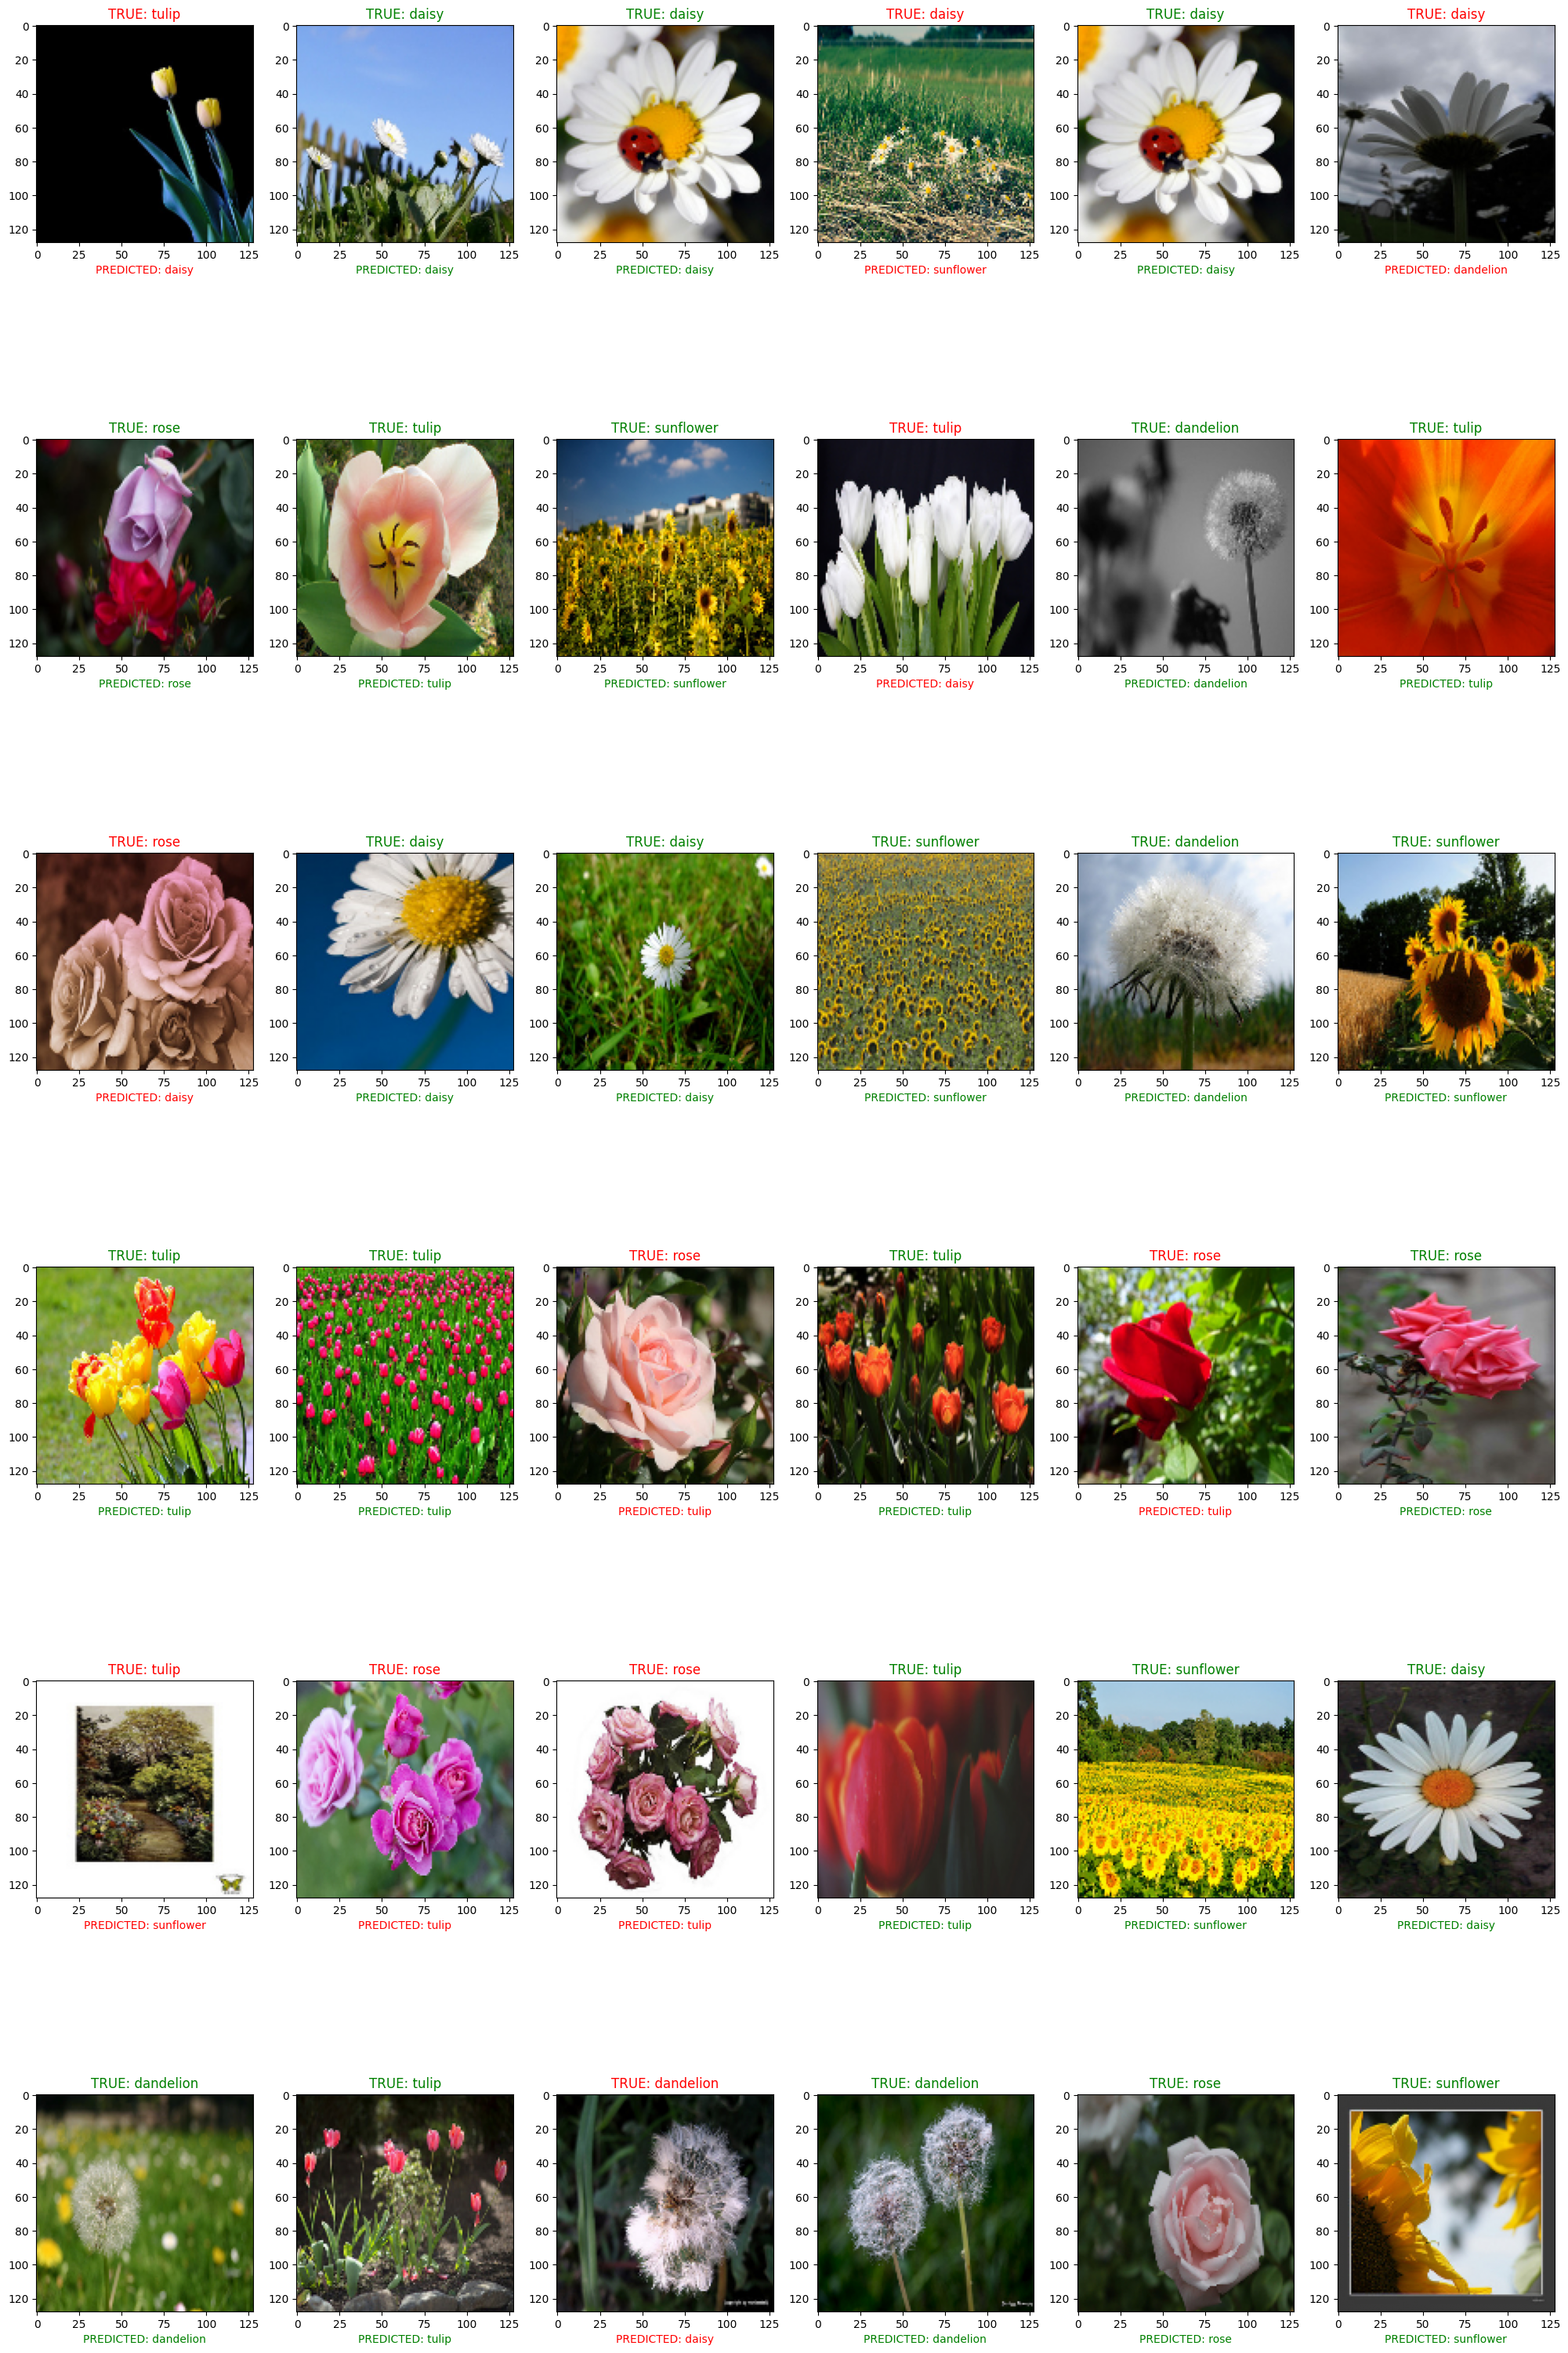

In [9]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

# Conclusion
In this code, we have explored the process of building a flower recognition model using Convolutional Neural Networks (CNNs). By leveraging the power of deep learning and image processing techniques, we can create a model capable of accurately classifying different types of flowers. The code snippets provided demonstrate how to load and preprocess image data, construct a CNN model architecture, and train the model using data augmentation. Finally, we evaluate the model's performance on a test set and visualize the results.

By following the steps outlined in this code, you can adapt this code to solve various image classification tasks or apply it to your own projects. Remember to reference the appropriate libraries and resources used. Keep exploring the fascinating world of computer vision and deep learning.